# CIFAR10 딥러닝 모델
CIFAR10 데이터셋은 32x32 픽셀의 6,000개 컬러 이미지로 이루어져 있습니다.    
데이터셋의 각 이미지는 10개의 클래스로 라벨링되어 있으며, 머신러닝 연구에 가장 널리 사용되고 있습니다.    
MNIST와 같이 머신러닝 연구에 가장 널리 사용되는 데이터셋

## 데이터 로드 및 전처리
* CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
* 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.
* 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
* 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers, utils, callbacks
from tensorflow.keras.datasets import cifar10

In [3]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full,
                                                  y_train_full,
                                                  test_size = 0.2,
                                                  random_state = 123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird',     
'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.


In [4]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다.

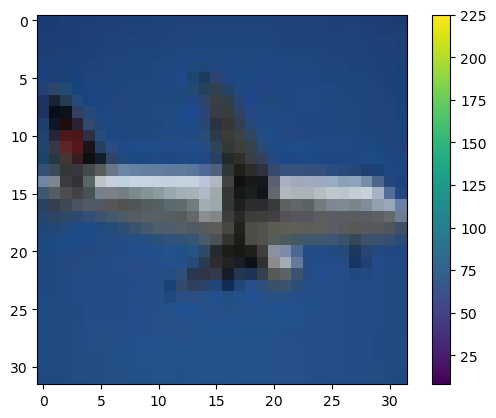

In [6]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [7]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.


In [8]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [9]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 모델 구성 및 컴파일
BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

In [18]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

model = models.Sequential()

model.add(layers.Dense(512, activation='relu', input_shape=(3072, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax', name='output'))

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 512)            │     5,120,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,257,482 (20.06 MB)

 Trainable params: 5,255,946 (20.05 MB)

 Non-trainable params: 1,536 (6.00 KB)

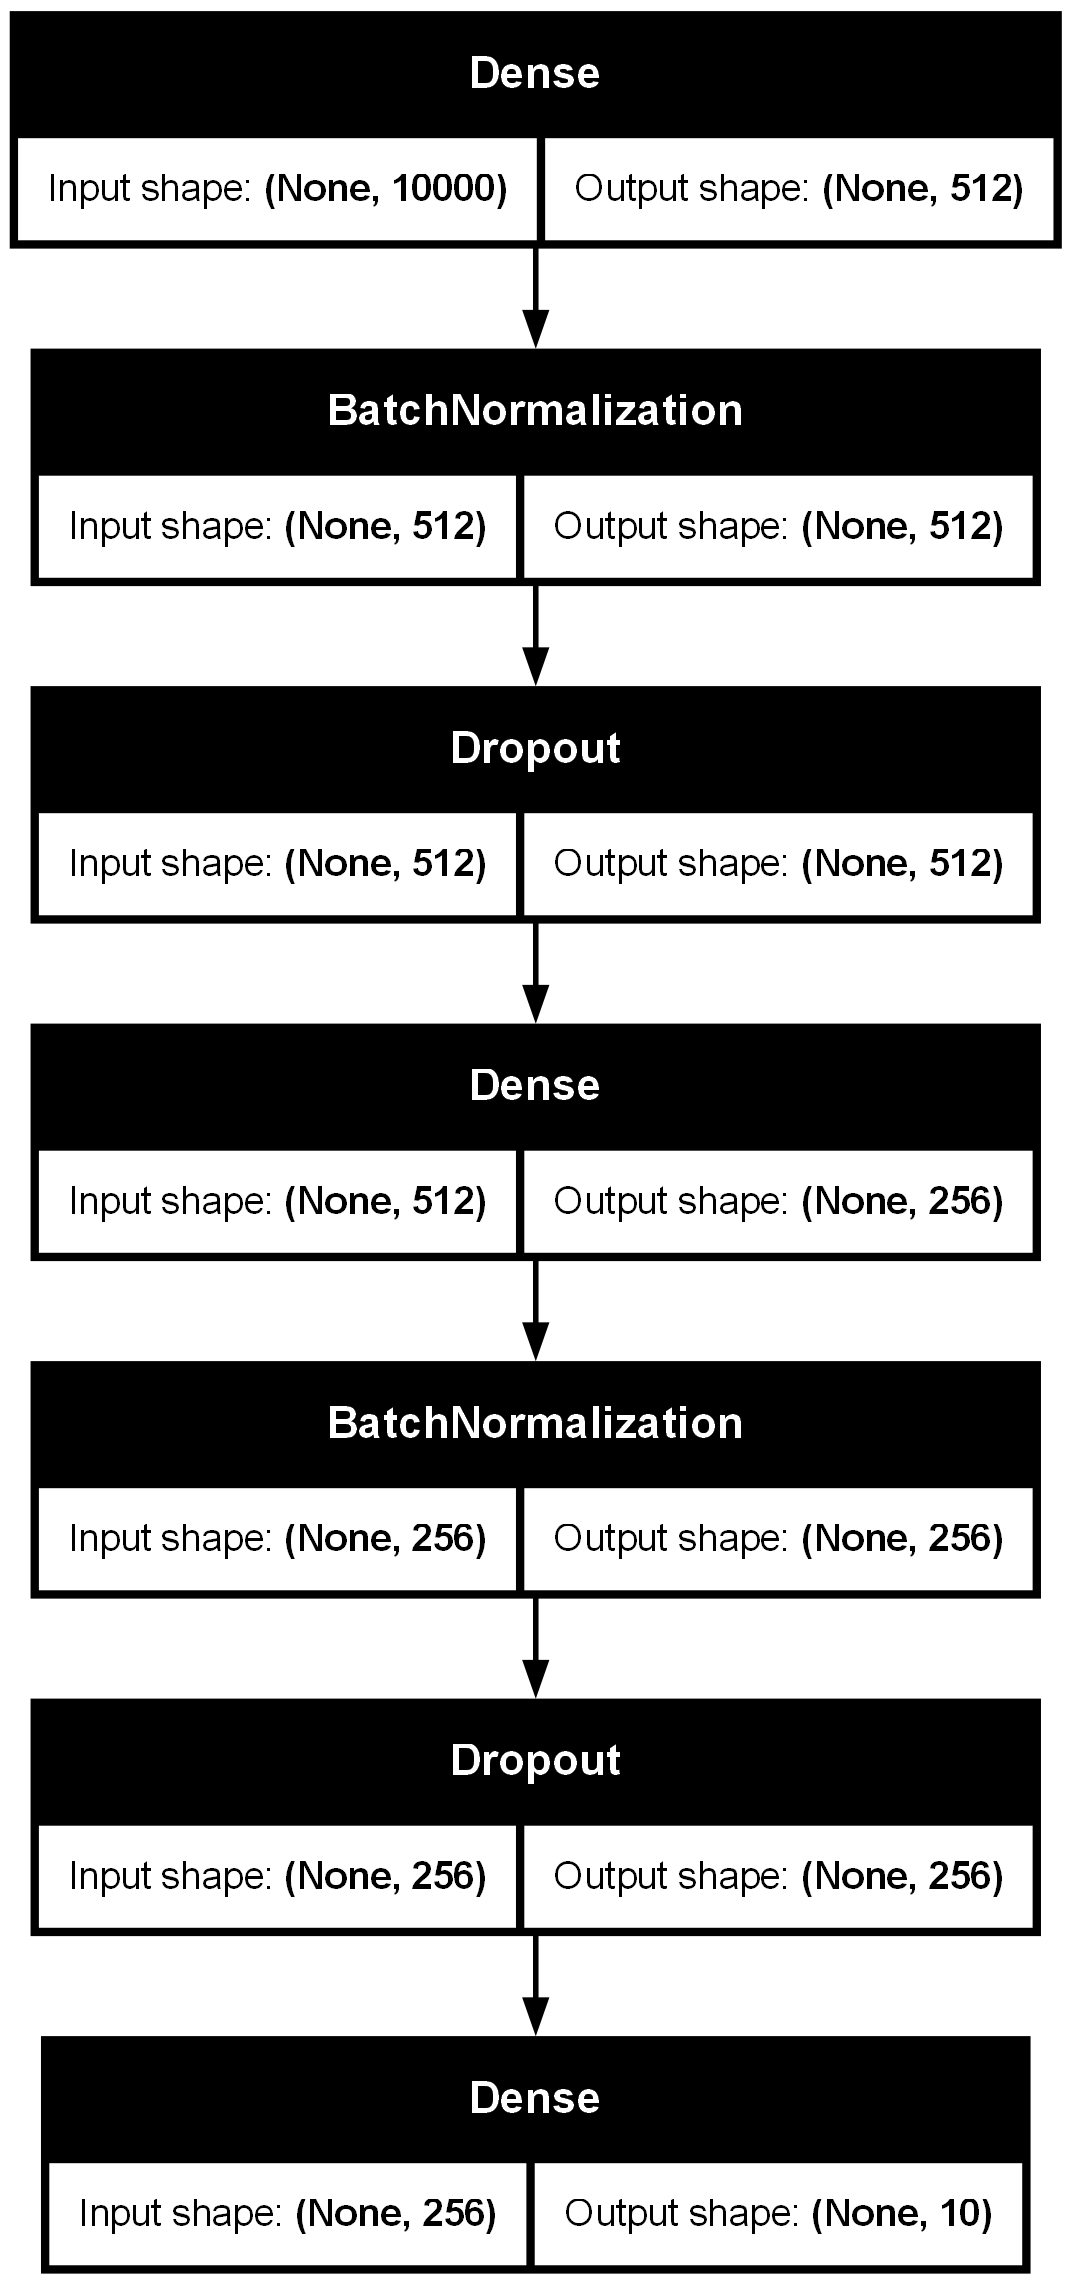

In [14]:
utils.plot_model(model, show_shapes=True)

## 모델 학습
ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [19]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
checkpoint_cb = callbacks.ModelCheckpoint('best_model_cifar.h5', save_best_only=True)

early_stopping_cb = callbacks.EarlyStopping(patience=5, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3040 - loss: 2.0914

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.3041 - loss: 2.0908 - val_accuracy: 0.3243 - val_loss: 1.9263
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4032 - loss: 1.6982

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.4032 - loss: 1.6982 - val_accuracy: 0.3379 - val_loss: 1.8999
Epoch 3/50
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4350 - loss: 1.5982

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.4350 - loss: 1.5981 - val_accuracy: 0.3542 - val_loss: 1.8551
Epoch 4/50
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4548 - loss: 1.5492

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.4548 - loss: 1.5491 - val_accuracy: 0.4125 - val_loss: 1.6739
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.4618 - loss: 1.5188 - val_accuracy: 0.4126 - val_loss: 1.6752
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.4761 - loss: 1.4844 - val_accuracy: 0.4213 - val_loss: 1.7051
Epoch 7/50
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4816 - loss: 1.4599

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.4815 - loss: 1.4599 - val_accuracy: 0.4584 - val_loss: 1.5448
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.4860 - loss: 1.4431 - val_accuracy: 0.4239 - val_loss: 1.6423
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.4930 - loss: 1.4335 - val_accuracy: 0.4494 - val_loss: 1.5716
Epoch 10/50
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5018 - loss: 1.4139

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.5018 - loss: 1.4139 - val_accuracy: 0.4604 - val_loss: 1.5375
Epoch 11/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.5075 - loss: 1.3837 - val_accuracy: 0.4333 - val_loss: 1.5957
Epoch 12/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5064 - loss: 1.3959

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.5064 - loss: 1.3959 - val_accuracy: 0.4872 - val_loss: 1.4618
Epoch 13/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.5066 - loss: 1.3791 - val_accuracy: 0.4809 - val_loss: 1.4677
Epoch 14/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.5164 - loss: 1.3627 - val_accuracy: 0.4832 - val_loss: 1.4755
Epoch 15/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.5213 - loss: 1.3533 - val_accuracy: 0.4839 - val_loss: 1.4795
Epoch 16/50
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5226 - loss: 1.3451

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.5226 - loss: 1.3451 - val_accuracy: 0.5004 - val_loss: 1.4489
Epoch 17/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.5281 - loss: 1.3345 - val_accuracy: 0.4839 - val_loss: 1.4608
Epoch 18/50
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5316 - loss: 1.3261

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.5316 - loss: 1.3262 - val_accuracy: 0.5032 - val_loss: 1.4000
Epoch 19/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.5359 - loss: 1.3179 - val_accuracy: 0.4044 - val_loss: 1.7211
Epoch 20/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.5338 - loss: 1.3121 - val_accuracy: 0.4928 - val_loss: 1.4564
Epoch 21/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.5365 - loss: 1.3032 - val_accuracy: 0.4792 - val_loss: 1.4693
Epoch 22/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.5351 - loss: 1.2980 - val_accuracy: 0.4965 - val_loss: 1.4355
Epoch 23/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.5431 - loss: 1.2864 - val_accuracy: 0.4792 - val_loss: 1.5045


학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

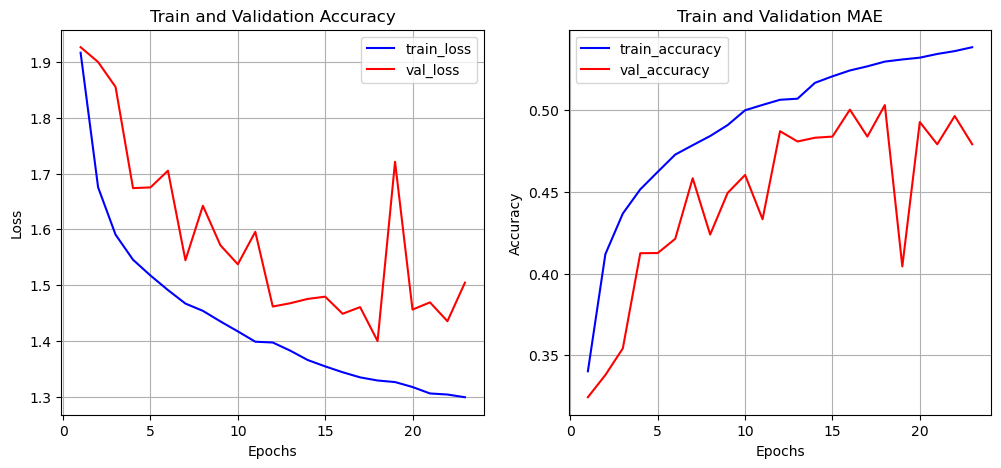

In [22]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [23]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5057 - loss: 1.3694


[1.372482419013977, 0.5048999786376953]

사실 지금까지 배운 Dense Layer만 활용해서는 이번 프로젝트에서 높은 accuracy를 얻기는 힘듭니다.     
이미지 데이터를 다루기 위해서는 이미지에 적합한 CNN(Convolution Neural Network) 계열의 모델을 사용해야 합니다.     
CNN에 대한 내용은 Computer Vision 과정을 통해 더 배울 수 있습니다.

# 3가지 딥러닝 모델 정리

이번 시간 정리
---
번 시간에는 딥러닝을 이용해 주택 가격 예측, 뉴스 주제 분류, 이미지 분류 등 다양한 응용에 활용하는 방법을 익혔습니다.    
어떤 데이터를 다루느냐에 따라 다양한 아키텍처를 사용해야 한다는 사실도 배웠습니다.    
따라서 이 과정 이후에 컴퓨터 비전, 자연어 처리 등과 같이 세분화된 딥러닝 모델을 익혀야 합니다.    
앞으로 다양한 딥러닝 모델을 학습하여 훌륭한 인공지능/딥러닝 개발자가 되시길 바라겠습니다.    